# Exploratory Data Analysis

In [500]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [501]:
# load the datasets
obs = pd.read_csv("/Users/administrador/Documents/learning-projects/biodiversity/observations.csv")

# print the first few rows of the DataFrame
print(obs.head(5))

# check for missing values
print(obs.isnull().sum())


            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
scientific_name    0
park_name          0
observations       0
dtype: int64


In [502]:
obs.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Myotis lucifugus,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [503]:
# Have duplicated data?
obs.duplicated().value_counts()

False    23281
True        15
dtype: int64

In [504]:
# Check for duplicate data
obs[obs.duplicated(subset=['scientific_name', 'park_name'])]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [505]:
obs[obs.scientific_name == 'Penstemon procerus']

,scientific_name,park_name,observations
55,Penstemon procerus,Great Smoky Mountains National Park,67
211,Penstemon procerus,Yellowstone National Park,215
2334,Penstemon procerus,Bryce National Park,98
16876,Penstemon procerus,Yosemite National Park,121


Duplicated scientific name. The same specie was found in different parks.

In [506]:
# Calculate the total observations for duplicate records and then remove the duplicates
obs['total'] = obs.groupby(['scientific_name', 'park_name'])['observations'].transform('sum')
obs.drop_duplicates(subset=['scientific_name', 'park_name'], keep='last', inplace=True)
obs = obs[['scientific_name', 'park_name', 'total']]
obs = obs.rename(columns={'total': 'observations'})
obs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


Let's do the same on spec dataframe

In [507]:
# load the datasets
spec = pd.read_csv("/Users/administrador/Documents/learning-projects/biodiversity/species_info.csv")
# print the first few rows of the DataFrame
print(spec.head(5))

# check for missing values
print(spec.isnull().sum())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


5633 missing data (96,72 %) on conservation_status column

In [508]:
spec.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [509]:
# Have duplicated data?
spec.duplicated().value_counts()

False    5824
dtype: int64

Let's check further, inside dataset

In [510]:
spec[spec.duplicated(subset=['scientific_name'])]

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


In [511]:
spec[spec.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


Let's drop the duplicate

In [512]:
spec.drop_duplicates(subset=['scientific_name'], keep='last', inplace=True)

In [513]:
spec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  179 non-null    object
dtypes: object(4)
memory usage: 216.4+ KB


### 1. What is the distribution of conservation_status for animals?


In [514]:
spec.conservation_status.isna().count()

5541

If a specie is not categorized in any status, it's not treated. Let's fill NaN with that information

In [515]:
spec.conservation_status = spec.conservation_status.fillna('No Intervention')

In [516]:
spec.conservation_status.head()

0       No Intervention
1       No Intervention
2       No Intervention
3       No Intervention
7    Species of Concern
Name: conservation_status, dtype: object

In [517]:
spec.conservation_status.value_counts()

No Intervention       5362
Species of Concern     151
Endangered              15
Threatened              10
In Recovery              3
Name: conservation_status, dtype: int64

In [518]:
spec.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

Animals = Mammal, Bird, Reptile, Amphibian, Fish, Vascular Plant, Nonvascular Plant

In [519]:
# Create a specific dataframe for animals
animal = ('Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish')
animals = spec.loc[spec['category'].isin(animal)]

In [520]:
animals.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
7,Mammal,Canis latrans,Coyote,Species of Concern


In [521]:
animals[['scientific_name', 'conservation_status']]\
    .groupby('conservation_status')\
        .count()/len(animals.scientific_name) * 100

,scientific_name
conservation_status,
Endangered,1.479915
In Recovery,0.317125
No Intervention,86.469345
Species of Concern,10.887949
Threatened,0.845666


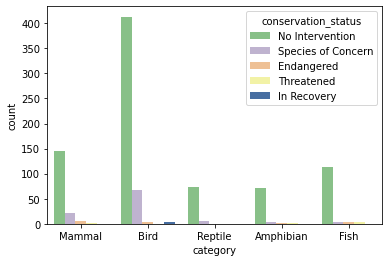

<Figure size 432x288 with 0 Axes>

In [522]:
sns.countplot(x='category', hue='conservation_status', data=animals, palette='Accent')
plt.show()
plt.clf()

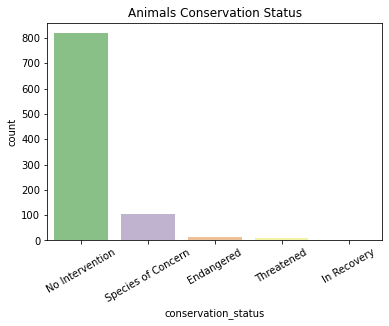

<Figure size 432x288 with 0 Axes>

In [523]:
sns.countplot(x='conservation_status', data=animals, palette='Accent')
plt.xticks(rotation=30)
plt.title('Animals Conservation Status')
plt.show()
plt.clf()

### 2. Are certain types of species more likely to be endangered?

In [524]:
spec_endangered = spec[spec.conservation_status == 'Endangered']
spec_endangered.head()

,category,scientific_name,common_names,conservation_status
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Grus americana,Whooping Crane,Endangered


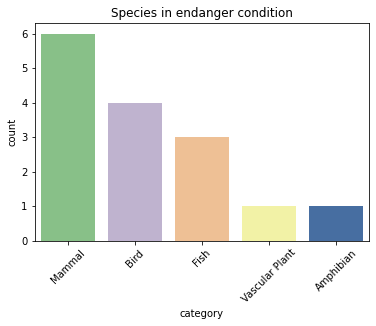

<Figure size 432x288 with 0 Axes>

In [525]:
sns.countplot(data=spec_endangered, x='category', palette='Accent')
plt.xticks(rotation=45)
plt.title('Species in endanger condition')
plt.show()
plt.clf()

In [526]:
spec_endangered.category.value_counts(normalize=True, ascending=False)

Mammal            0.400000
Bird              0.266667
Fish              0.200000
Vascular Plant    0.066667
Amphibian         0.066667
Name: category, dtype: float64

**2. Are certain types of species more likely to be endangered?**

Our observation, shows that mammals, bird and fish are the top 3 species in danger situation.
According the data:
- 40% mammal
- 26% bird
- 20% fish
- 6% Plant
- 6% Anphibian

Two of all species observed are not in danger: reptile and nonvascular plants.

In [527]:
# Merge the dataframes
species_df = spec.merge(obs, on='scientific_name')

In [528]:
# print the first few rows of the DataFrame
species_df.head(5)

# print the DataFrame's shape
species_df.shape

# print the DataFrame's data types and other info
species_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22164 entries, 0 to 22163
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             22164 non-null  object
 1   scientific_name      22164 non-null  object
 2   common_names         22164 non-null  object
 3   conservation_status  22164 non-null  object
 4   park_name            22164 non-null  object
 5   observations         22164 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 1.2+ MB


### 3. Are the differences between species and their conservation status significant?

In [529]:
# Create a column for treated or not treated species
species_df['under_protection'] = species_df.conservation_status != 'No Intervention'


In [530]:
species_df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations,under_protection
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Bryce National Park,130,False
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Yellowstone National Park,270,False
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Great Smoky Mountains National Park,98,False
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Yosemite National Park,117,False
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,Yosemite National Park,128,False


Now, we can group category and under_protection.

In [531]:
category_counts = species_df.groupby(['category', 'under_protection'])\
    .scientific_name.nunique()\
    .reset_index()\
    .pivot(columns='under_protection',
                index='category',
                values='scientific_name')\
    .reset_index()
category_counts.columns = ['category', 'not_protected', 'protected']

In [532]:
category_counts

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,114,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


To better understand the statistic, let's calculate the percentage of each status

In [533]:
category_counts['perc_protected'] = category_counts.protected / \
    (category_counts.protected + category_counts.not_protected) * 100

In [534]:
category_counts

,category,not_protected,protected,perc_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,114,11,8.800000
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


Mammals and Bird have the most % of protected species.
Now, let's check the statistical significance for this pair of categorical variables.

In [535]:
# Run a contingency1 test between values for 2x2 table protected / not_protected / mammal / bird 
# Mammal - protected: 30 / not_protected: 146
# Bird - protected: 75 / not_protected: 413

from scipy.stats import chi2_contingency
contingency1 = [[30, 146],
              [75, 413]]
              
chi2_contingency(contingency1)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

p-value is 0.68 > 0.05 there are no significant relationship between birds and mammals, the variables are independent.

Now, let's check the signicicance between mammals and reptiles.

In [536]:
contingency1 = [[30, 146],
              [5, 73]]
              
chi2_contingency(contingency1)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

p-value is 0.038 < 0.05. The are significant relationship between Mammals and Reptiles.

### 4. Which specie is most prevalent and what is their distribution amongst parks?

First, we need to look at the common names to get an idea of prevalent species in dataset. Split it and clean the words in each row.

In [537]:
species_df.common_names.head()

0    Gapper's Red-Backed Vole
1    Gapper's Red-Backed Vole
2    Gapper's Red-Backed Vole
3    Gapper's Red-Backed Vole
4       American Bison, Bison
Name: common_names, dtype: object

In [538]:
# Remove the ponctuations
from itertools import chain
import string

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

common_Names = species_df[species_df['category'] == "Mammal"]\
    .common_names\
    .apply(remove_punctuations)\
    .str.split().tolist()

In [539]:
common_Names[:5]

[['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison']]

Clean up duplicate words in each row. It should not be counted more than once per species.

In [540]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['American', 'Bison']]

In [541]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'Gappers', 'RedBacked', 'Vole']

In [542]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i,x))

pd.DataFrame(set(words_counted), columns =['Word', 'Count']).sort_values("Count", ascending = False).head(10)

,Word,Count
23,Bat,64
37,Mouse,60
177,Shrew,56
42,Myotis,52
89,Squirrel,48
128,Chipmunk,48
143,Vole,40
137,Eastern,40
179,Western,32
27,American,32


How many observation for bat?

In [543]:
species_df['is_bat'] = species_df.common_names.str.contains(r"\bBat\b", regex = True)

In [544]:
species_df.head()

,category,scientific_name,common_names,conservation_status,park_name,observations,under_protection,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Bryce National Park,130,False,False
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Yellowstone National Park,270,False,False
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Great Smoky Mountains National Park,98,False,False
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,Yosemite National Park,117,False,False
4,Mammal,Bos bison,"American Bison, Bison",No Intervention,Yosemite National Park,128,False,False


In [545]:
species_df[species_df.is_bat]

,category,scientific_name,common_names,conservation_status,park_name,observations,under_protection,is_bat
68,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Yosemite National Park,188,False,True
69,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Great Smoky Mountains National Park,80,False,True
70,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Bryce National Park,57,False,True
71,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,Yellowstone National Park,259,False,True
72,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,Yosemite National Park,134,False,True
...,...,...,...,...,...,...,...,...
16727,Mammal,Lasiurus blossevillii,Western Red Bat,Species of Concern,Yellowstone National Park,221,True,True
16740,Mammal,Parastrellus hesperus,Canyon Bat,No Intervention,Great Smoky Mountains National Park,81,False,True
16741,Mammal,Parastrellus hesperus,Canyon Bat,No Intervention,Bryce National Park,93,False,True
16742,Mammal,Parastrellus hesperus,Canyon Bat,No Intervention,Yosemite National Park,149,False,True


In [546]:
bat_observation = species_df[species_df.is_bat].groupby(['park_name'])['observations'].sum().reset_index()

In [547]:
bat_observation

,park_name,observations
0,Bryce National Park,1811
1,Great Smoky Mountains National Park,1355
2,Yellowstone National Park,4584
3,Yosemite National Park,2657


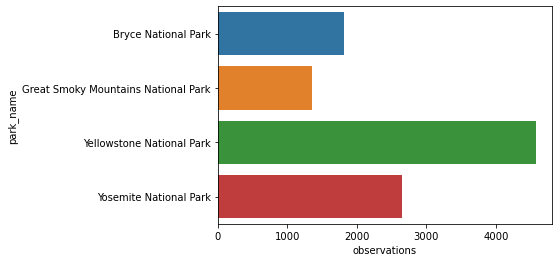

In [572]:
sns.barplot(data=bat_observation, x='observations', y='park_name')
plt.xticks(rotation=0)
plt.show()

How many observation for mouse?

In [573]:
species_df['is_mouse'] = species_df.common_names.str.contains(r"\bMouse\b", regex = True)

In [576]:
mouse_observation = species_df[species_df.is_mouse].groupby(['park_name'])['observations'].sum().reset_index()
mouse_observation

,park_name,observations
0,Bryce National Park,2227
1,Great Smoky Mountains National Park,1595
2,Yellowstone National Park,5836
3,Yosemite National Park,3392


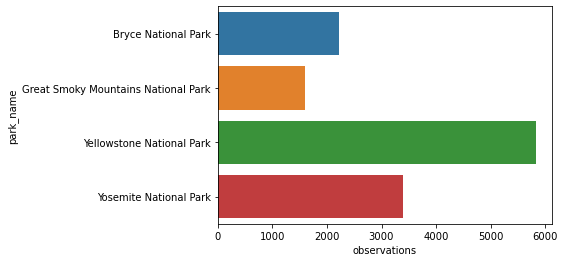

In [577]:
sns.barplot(data=mouse_observation, x='observations', y='park_name')
plt.xticks(rotation=0)
plt.show()

###